In [1]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install kmapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [3]:
import kmapper as km
from kmapper.jupyter import display
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')
df1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [61]:
df1 = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')

var1='Flavanoids'
var2='Proanthocyanins'
df = pd.concat([df1[var1] , df1[var2]], axis=1)

df

,Flavanoids,Proanthocyanins
0,3.06,2.29
1,2.76,1.28
2,3.24,2.81
3,3.49,2.18
4,2.69,1.82
...,...,...
173,0.61,1.06
174,0.75,1.41
175,0.69,1.35
176,0.68,1.46


Veamos la información básica de la base de datos de aquellos valores no categóricos.

In [62]:
data = df.to_numpy()
data

array([[3.06, 2.29],
       [2.76, 1.28],
       [3.24, 2.81],
       [3.49, 2.18],
       [2.69, 1.82],
       [3.39, 1.97],
       [2.52, 1.98],
       [2.51, 1.25],
       [2.98, 1.98],
       [3.15, 1.85],
       [3.32, 2.38],
       [2.43, 1.57],
       [2.76, 1.81],
       [3.69, 2.81],
       [3.64, 2.96],
       [2.91, 1.46],
       [3.14, 1.97],
       [3.4 , 1.72],
       [3.93, 1.86],
       [3.03, 1.66],
       [3.17, 2.1 ],
       [2.41, 1.98],
       [2.88, 1.69],
       [2.37, 1.46],
       [2.61, 1.66],
       [2.68, 1.92],
       [2.94, 1.45],
       [2.19, 1.35],
       [2.97, 1.76],
       [2.33, 1.98],
       [3.25, 2.38],
       [3.19, 1.95],
       [2.69, 1.97],
       [2.74, 1.35],
       [2.53, 1.54],
       [2.98, 1.86],
       [2.68, 1.36],
       [2.43, 1.44],
       [2.64, 1.37],
       [3.04, 2.08],
       [3.29, 2.34],
       [2.68, 1.48],
       [3.56, 1.7 ],
       [2.63, 1.66],
       [3.  , 2.03],
       [2.65, 1.25],
       [3.17, 2.19],
       [3.39,

In [63]:
mean_other_score=(data[:,1])

In [64]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data, projection=[0] )


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()



In [65]:
covering=km.Cover(n_cubes=4,perc_overlap=0.2)

In [66]:
G = mapper.map(projected_data, data, clusterer=sklearn.cluster.KMeans(n_clusters=4),cover=covering)

Mapping on data shaped (178, 2) using lens shaped (178, 1)

Creating 4 hypercubes.

Created 7 edges and 12 nodes in 0:00:00.031787.


In [67]:
G['meta_data']

{'projection': '[0]',
 'n_cubes': 4,
 'perc_overlap': 0.2,
 'clusterer': 'KMeans(n_clusters=4)',
 'scaler': 'MinMaxScaler()'}

In [68]:
mapper.visualize(G,
                title='Gráfico de clusters',
                #custom_tooltips = performance_data['gender'].to_numpy(),
                color_values = mean_other_score,
                color_function_name = 'Variables',

                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("level_education_math" + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


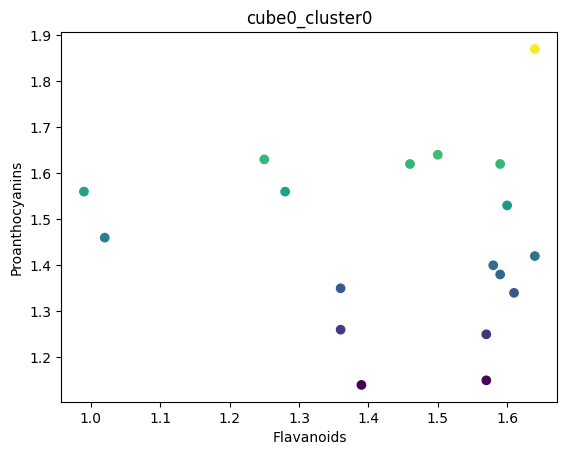

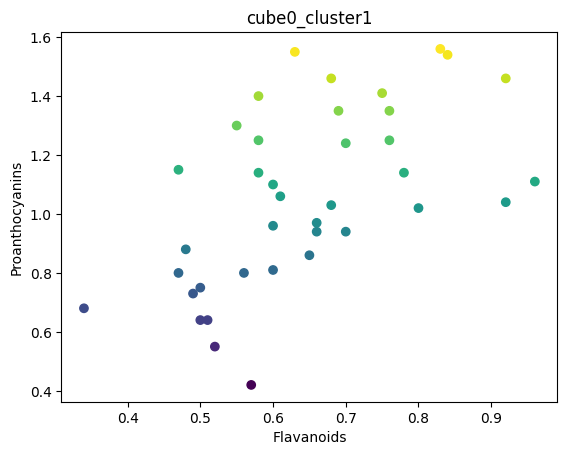

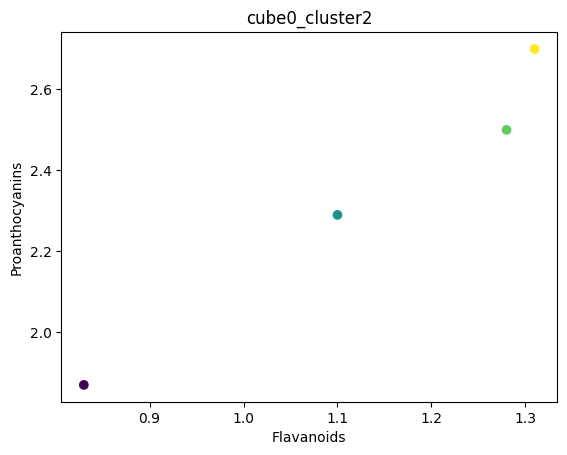

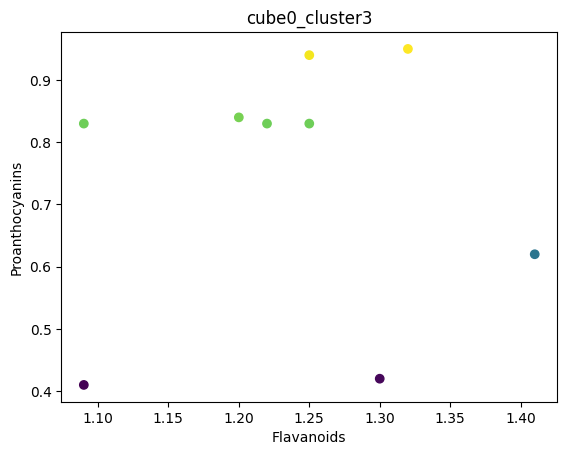

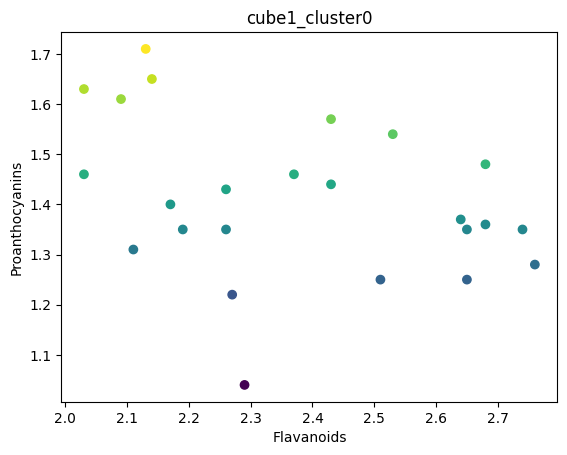

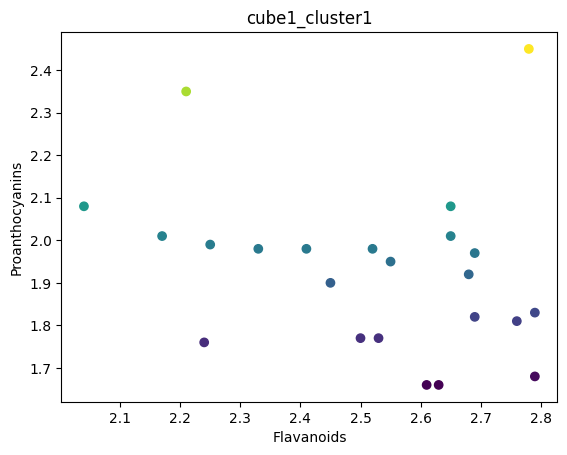

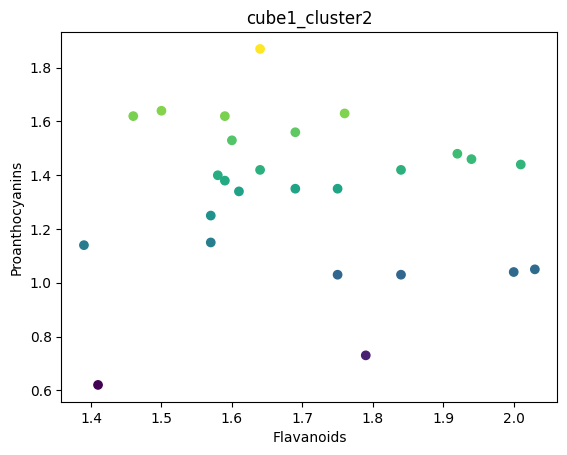

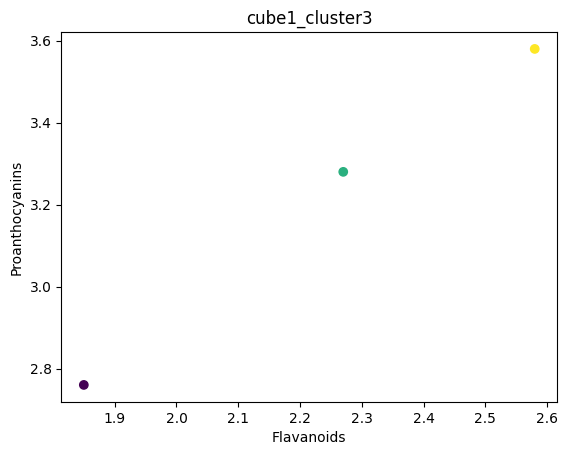

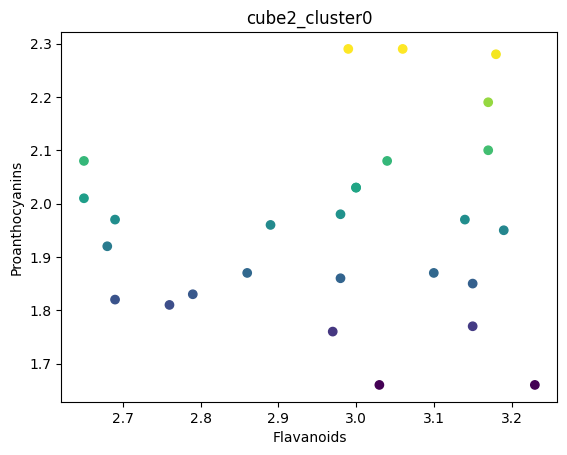

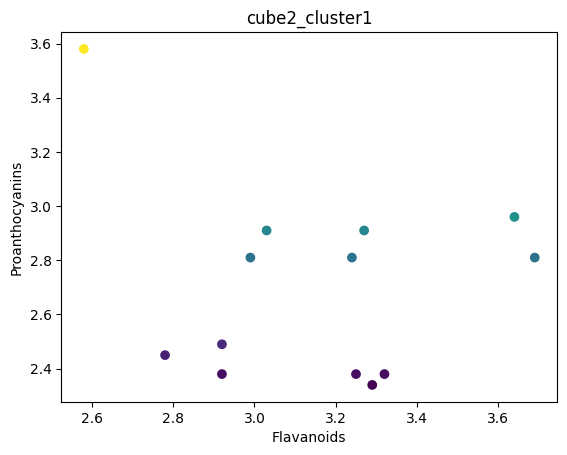

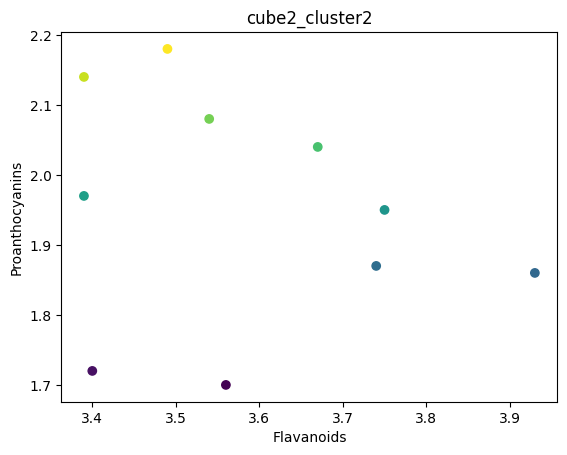

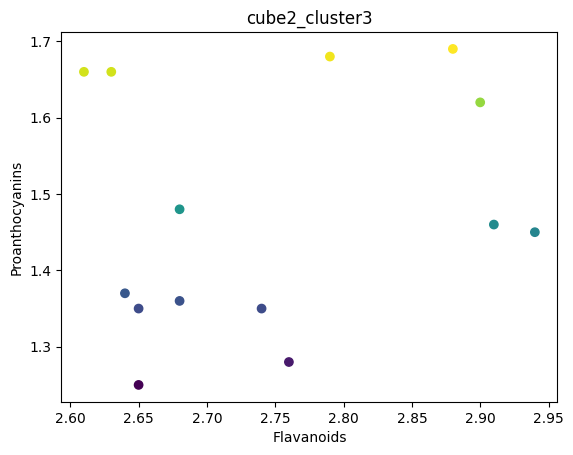

In [69]:
import matplotlib.pyplot as plt

# Obtener la lista de todos los nodos en el grafo G
nodos = list(G['nodes'].keys())

# Iterar sobre todos los nodos
for nodo in nodos:
    mvstwo_cube3c1 = df1.iloc[G['nodes'][nodo], :]
    x = mvstwo_cube3c1[var1]
    y = mean_other_score[G['nodes'][nodo]]

    # Crear el gráfico de dispersión
    scatter = plt.scatter(x=x, y=y, c=y, cmap='viridis')

    # Configurar título y ejes
    plt.title(nodo)
    plt.xlabel(var1)
    plt.ylabel(var2)

    # Mostrar el gráfico
    plt.show()
